## Predicting Financial Accounting for 2018

Skewness of Financial Accounting =  المحاسبة المالية    1.405157
dtype: float64 



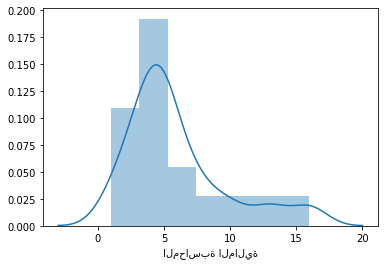

In [22]:
#Read Data
import pandas as pd
import seaborn as sns

fa = pd.read_excel('Study Data.xlsx', sheet_name= 'Main Research Subjects', usecols= ['السنوات', 'المحاسبة المالية'], parse_dates=['السنوات'])
fa.set_index('السنوات', inplace=True)
print('Skewness of Financial Accounting = ', fa.skew(), '\n')
sns.distplot(fa.iloc[:,0]);

### Perform Forecasting by Naive Method - Simple Mean

In [2]:
print('Financial Accounting for 2018 = ', '{:.2F}'.format(fa['المحاسبة المالية'].mean()))

Financial Accounting for 2018 =  5.94


### Perform Forecasting By converting Time Series to Supervised Learning

In [3]:
#Read Data

import pandas as pd
fa = pd.read_excel('Study Data.xlsx', sheet_name= 'Main Research Subjects', usecols= ['السنوات', 'المحاسبة المالية'], parse_dates=['السنوات'])
fa.set_index('السنوات', inplace=True)

#Framing data to enable forecasting time series as supervised learning - Linear Regression & SVM are utilized
shifted_fa = fa.copy()
shifted_fa['y-1'] = shifted_fa['المحاسبة المالية'].shift(1)
shifted_fa['y+1'] = shifted_fa['المحاسبة المالية'].shift(-1)
shifted_fa.dropna(how='any', inplace=True)

#Splitting data for training and testing
X = shifted_fa.iloc[:, : -1].values
y = shifted_fa.iloc[:, -1:].values
X_train, X_test, y_train, y_test = X[:-2], X[-2:], y[:-2], y[-2:]

In [23]:
#Apply Linear Regression Prediction (Forecasting)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print('predicted', lr.predict(X_test))
print('Actual', y_test.ravel())
print('LR R^2 = ', lr.score(X_test, y_test))
#Financial Accounting Forecasting for 2018
print('Financial Accounting for 2018 utilizing LR = ', lr.predict([[4.0, 3.0]]))
print ('------------------------------------------------------------')



#Apply SVM Prediction (Forecasting)
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=2)
svr.fit(X_train, y_train.ravel())
print('predicted', svr.predict(X_test))
print('Actual', y_test.ravel())
print('svr R^2 = ', svr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Financial Accounting for 2018 utlizing SVM = ', svr.predict([[4.0, 3.0]]))
print ('------------------------------------------------------------')


#Apply Randomforest Prediction (Forecasting)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, max_depth=2, random_state=42)
rfr.fit(X_train, y_train.ravel())
print('predicted', rfr.predict(X_test))
print('Actual', y_test.ravel())
print('RF R^2 = ', rfr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Financial Accounting for 2018 utilizing RF= ', rfr.predict([[4.0, 3.0]]))

ValueError: Found input variables with inconsistent numbers of samples: [15, 13]

### Perform Forecasting Using Time Series ARIMA Model

AIC =  76.12181772736085
Financial Accounting for 2018 utilizing ARIMA=  4.300606144929567


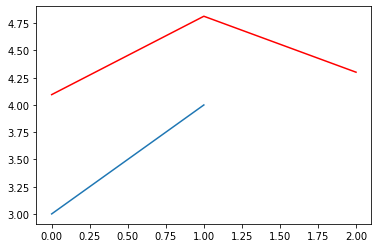

In [5]:
#Utilizing ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

#devide data for train and test
X = fa.values
X_train, X_test= X[:-2], X[-2:]
predictions = []


arima_mod = ARIMA(X_train, order= (1,1,1))
arima_mod_fit = arima_mod.fit()
print('AIC = ', arima_mod_fit.aic)

#predictions
predictions = arima_mod_fit.forecast(steps = 3)[0]
predictions

plt.plot(X_test)
plt.plot(predictions, color = 'red');

print('Financial Accounting for 2018 utilizing ARIMA= ', predictions[2])